# Python Cheatsheets - DATA VISUALIZATION

## Matplotlib
Matplotlib is a Python package to create two-dimensional plots from data stored in a variety of data structures (i.e. lists, numpy arrays, pandas dataframes). It uses an object oriented approach for plotting to build plots step-by-step by adding new elements to the plot.

In [17]:
# import necessary libraries for plotting, pandas, and file reading
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv

Matplotlib provides many common plotting commands. Some of these plotting commands are shown below. For more types, please refer to the original matplotlib package sources (https://matplotlib.org/stable/plot_types).

#### 1) Line Plot 
A line plot is a simple plot joining straight lines connecting data points where the x-axis and y-axis values intersect.

- __Plot a List with a Line Plot:__

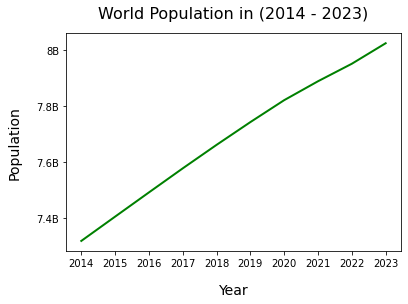

In [ ]:
# line Plot (world population extracted from https://databank.worldbank.org/)
file = open("data/world_population.csv", "r")
[year, pop] = list(csv.reader(file, delimiter=";"))
file.close()

pop = [int(i) for i in pop]
# plot the data using preferred style (for detailed arguments: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)
plt.plot(year, pop, color='green', linewidth=2.0)

# customize plot labels
plt.title("World Population in (2014 - 2023)", pad=15, fontsize=16)
plt.xlabel('Year', labelpad=15, fontsize=14)
plt.ylabel('Population', labelpad=15, fontsize=14)

# adapt the ticks on the y-axis
tick_val = [7400000000, 7600000000, 7800000000, 8000000000]
tick_lab = ['7.4B', '7.6B', '7.8B', '8B']
plt.yticks(tick_val, tick_lab)

# customizations need to be completed before .show() to be visible
plt.show()

- __Plot a DataFrame with a Line Plot:__

<AxesSubplot:xlabel='Year', ylabel='Schooling (year)'>

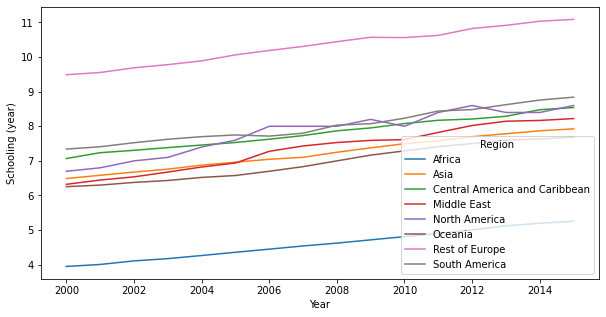

In [6]:
# read the csv file (data extraxted from https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated)
world = pd.read_csv('data/world_development.csv', index_col=0)

# subset the rows where the economy status is developing
developing_countries = world[world["Economy_status_Developing"] == 1]

# pivot schooling by year and region
schooling_by_region_year = developing_countries.pivot_table(index="Region", columns="Year", values="Schooling")

# create a line plot of the schooling (avg years that people aged 25+ spent in formal education) of developing countries by year
schooling_by_region_year.T.plot(kind="line", ylabel='Schooling (year)', figsize=(10, 5))


Another way of creating a plot with matplotlib is to create a figure (the image container for the plot) and axe(s) (the plot to add the related data).

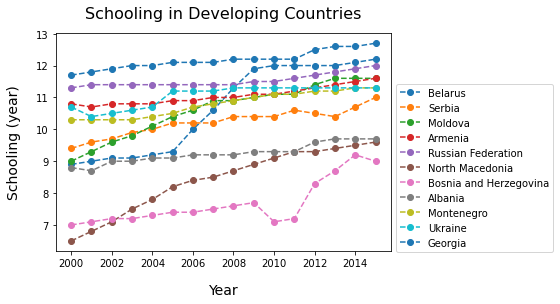

In [56]:
# read the csv file (data extraxted from https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated)
#world = pd.read_csv('data/world_development.csv', index_col=0)

# subset the rows where the economy status is developing and the country is in the rest of Europe
dev_eur = world[(world["Economy_status_Developing"] == 1) & (world["Region"] == "Rest of Europe")].sort_values(by=["Year"])

# create a list of filtered countries
countries = dev_eur["Country"].value_counts().index.tolist()

# create a figure and an axes with plt.subplots
fig, ax = plt.subplots()

# loop over the countries to add individual data
for country in countries:
    
    # create a line plot of the schooling (avg years that people aged 25+ spent in formal education) of developing country by year
    ax.plot(dev_eur[dev_eur["Country"] == country]["Year"], 
            dev_eur[dev_eur["Country"] == country]["Schooling"], 
            marker="o", linestyle="--", label=country)
    # use below to set axes labels and title
    #ax.set_xlabel("...")
    #ax.set_ylabel("...")
    #ax.set_title("...")
    
# add legend to demonstrate the color mapping
plt.legend(loc="lower right", bbox_to_anchor=(1.5, -0.027))

# add plot labels and title
plt.xlabel("Year", labelpad=15, fontsize=14)
plt.ylabel("Schooling (year)", labelpad=15, fontsize=14)
plt.title("Schooling in Developing Countries", pad=15, fontsize=16)

# call the show function
plt.show()

Calling ```.subplots()``` function with dimension parameters is helpful to create multiple plots in the plotting figure.

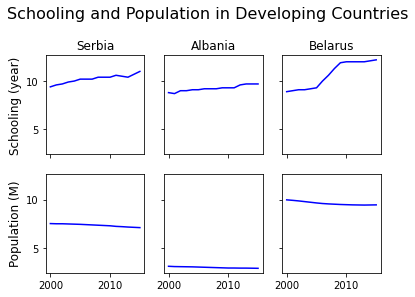

In [88]:
# run this cell only after the one above!
# create a figure and an axes with plt.subplots
fig, ax = plt.subplots(2, 3, sharey=True, sharex=True)

# the list of countries to be plotted
countries = ["Serbia", "Albania", "Belarus"]

# loop over the countries to add individual data
for i, country in enumerate(countries):
    filtered = dev_eur[dev_eur["Country"] == country]
    ax[0, i].plot(filtered["Year"],
                  filtered["Schooling"], color = 'b')
    ax[0, i].set_title(country)
    
    ax[1, i].plot(filtered["Year"],
                  filtered["Population_mln"], color = 'b')
    
ax[0, 0].set_ylabel("Schooling (year)", fontsize=12)
ax[1, 0].set_ylabel("Population (M)", fontsize=12)

# add plot labels and title
plt.suptitle("Schooling and Population in Developing Countries", y=1.05, fontsize=16)

# call the show function
plt.show()

To plot two time-series variables that were recorded at the same times, ```.twinx()``` function is used by adding both of them to the same subplot.

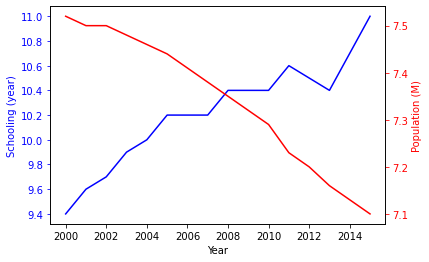

In [91]:
# run this cell only after the one above!
# define a function to plot time series
def plot_ts(axes, x, y, xlabel, ylabel, color='m'):
  # plot the inputs
  axes.plot(x, y, color=color)
  
  # set the colors tick params for y-axis
  axes.tick_params('y', colors=color)

  # set the labels
  axes.set_xlabel(xlabel)
  axes.set_ylabel(ylabel, color=color)

# create a figure and an axes with plt.subplots
fig, ax = plt.subplots()

# plot the schooling data for Serbia
serbia = dev_eur[dev_eur["Country"] == "Serbia"]
plot_ts(ax, serbia["Year"], serbia["Schooling"], "Year", "Schooling (year)", color='b')

# create a twin Axes that shares the x-axis
ax2 = ax.twinx()

# plot the relative population in red
plot_ts(ax2, serbia["Year"], serbia["Population_mln"], "Year", "Population (M)", color='r')

# call the show function
plt.show()

#### 2) Bar Plot 
A bar plot or bar chart presents comparison between categories, and represents the category of data with rectangular bars which lengths and heights are proportional to the values they represent. The bar plots can be plotted horizontally or vertically.

- __Plot a List with a Bar Plot:__

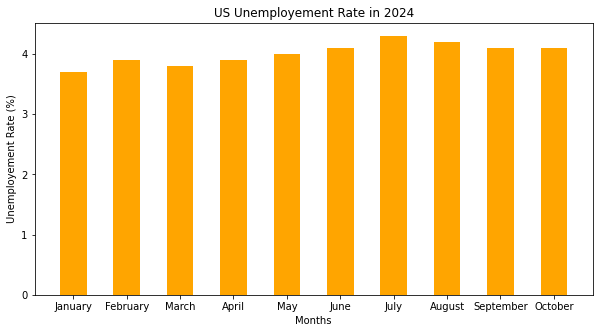

In [44]:
# a sample dataset generation
data_dict = {'January':3.70, 'February':3.90, 'March':3.80, 'April':3.90, 'May':4.00, 
             'June':4.10, 'July':4.30, 'August':4.20, 'September':4.10, 'October':4.10}

months = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (10, 5))

#  bar plot unemployement rate
plt.bar(months, values, color ='orange', width = 0.5)
plt.xlabel("Months")
plt.ylabel("Unemployement Rate (%)")
plt.title("US Unemployement Rate in 2024")
plt.show()

- __Plot a DataFrame with a Bar Plot:__

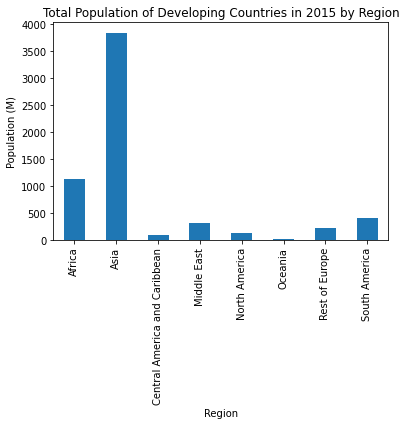

In [15]:
# read the csv file (data extraxted from https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated)
#world = pd.read_csv('data/world_development.csv', index_col=0)

# subset the rows where the economy status is developing and drop duplicate countries
developing_countries_2015 = world[(world["Economy_status_Developing"] == 1) &
                                  (world["Year"] == 2015)].drop_duplicates(subset="Country")

# group by region and get the sum of the population
pop_by_region = developing_countries_2015.groupby("Region")["Population_mln"].sum()

# create a bar plot of the total population of developing countries by region
pop_by_region.plot(kind="bar", title="Total Population of Developing Countries in 2015 by Region", ylabel="Population (M)")

# show the plot
plt.show()

Another way of creating a bar plot with matplotlib is to create a figure (the image container for the plot) and axe(s) (the plot to add the related data).

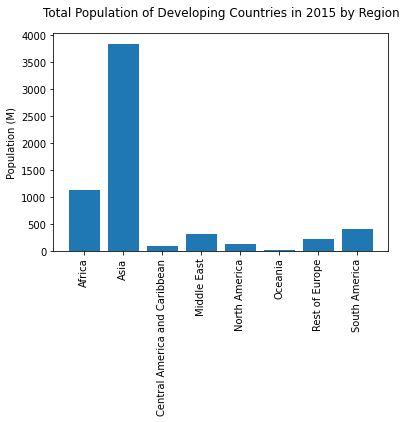

In [14]:
# read the csv file (data extraxted from https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated)
#world = pd.read_csv('data/world_development.csv', index_col=0)

# subset the rows where the economy status is developing and drop duplicate countries
developing_countries_2015 = world[(world["Economy_status_Developing"] == 1) &
                                  (world["Year"] == 2015)].drop_duplicates(subset="Country")

# group by region and get the sum of the population
pop_by_region = developing_countries_2015.groupby("Region")["Population_mln"].sum()

# create a figure and an axes with plt.subplots
fig, ax = plt.subplots()

# plot a bar plot of the total population of developing countries by region
ax.bar(pop_by_region.index, pop_by_region.values)

# set the axis labels and title
ax.tick_params(axis='x', labelrotation = 90)
ax.set_ylabel("Population (M)")
ax.set_title("Total Population of Developing Countries in 2015 by Region", y=1.05)

# show the plot
plt.show()

A stacked bar plot contains bars, where the height of each bar represents values. Stacked on top of the previous variables may be another variables with additional height.

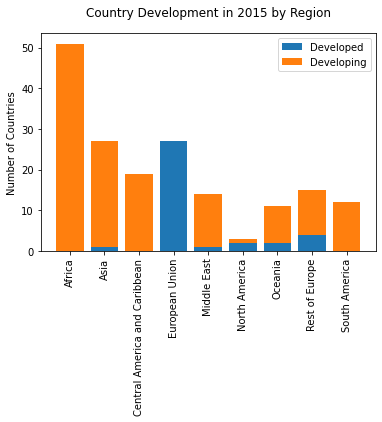

In [25]:
# read the csv file (data extraxted from https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated)
#world = pd.read_csv('data/world_development.csv', index_col=0)

# subset the rows within 2015
countries_2015 = world[world["Year"] == 2015].drop_duplicates(subset="Country")

# group by region and get the sum of the population
dev_by_region = countries_2015.groupby("Region").sum()

# create a figure and an axes with plt.subplots
fig, ax = plt.subplots()

# plot a bar plot of the developed countries by region
ax.bar(dev_by_region.index, dev_by_region["Economy_status_Developed"], label="Developed")

# plot a bar plot of the developing countries by region
ax.bar(dev_by_region.index, dev_by_region["Economy_status_Developing"], bottom=dev_by_region["Economy_status_Developed"], label="Developing")

# set the customizations
ax.tick_params(axis='x', labelrotation = 90)
ax.set_ylabel("Number of Countries")
ax.set_title("Country Development in 2015 by Region", y=1.05)
ax.legend()

# show the plot
plt.show()

#### 3) Scatter Plot 
A scatter plot is more suitable in cases such as assessing a correlation between two variables rather than observing a time data.

- __Plot a List with a Scatter Plot:__

In [ ]:
# scatter Plot (data extraxted from https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated)
file = open("data/life_expectancy.csv", "r")
table = list(csv.reader(file, delimiter=";"))
file.close()

Read the necessary columns from the data for demonstration and plot customization.

In [ ]:
# get the related data for plotting (easier and faster with pandas, this is only for demonstration)
gdp_cap = [float(i[13]) for i in table[1:] if int(i[2])==2000]
life_exp = [float(i[20]) for i in table[1:] if int(i[2])==2000]

# get the population and store as a numpy array to create different sized bubles
pop = [float(i[14]) for i in table[1:] if int(i[2])==2000]
np_pop = np.array(pop)

# get the region and store as an array to match with colors using a dictionary
region = [i[1] for i in table[1:] if int(i[2])==2000]
dict_col = {
    'Africa':'red',
    'Asia':'purple',
    'Central America and Caribbean':'magenta',
    'European Union':'blue',
    'Middle East':'black',
    'North America':'green',
    'Oceania':'brown',
    'Rest of Europe':'navy',
    'South America':'orange'
}
col = [*map(dict_col.get, region)]

Plot the data using the data elements and preferred customization.

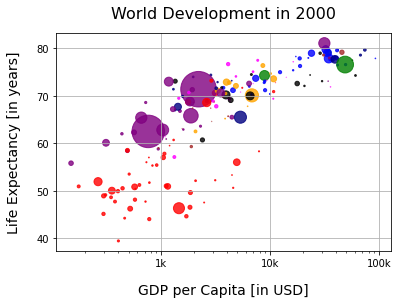

In [ ]:
# change the line plot below to a scatter plot
plt.scatter(gdp_cap, life_exp, s = np_pop, c = col, alpha = 0.8)

# put the x-axis on a logarithmic scale
plt.xscale('log')

# customize plot labels
plt.title("World Development in 2000", pad=15, fontsize=16)
plt.xlabel('GDP per Capita [in USD]', labelpad=15, fontsize=14)
plt.ylabel('Life Expectancy [in years]', labelpad=15, fontsize=14)

# adapt the ticks on the x-axis
tick_val = [1000, 10000, 100000]
tick_lab = ['1k', '10k', '100k']
plt.xticks(tick_val, tick_lab)

# add grid() call for a plot with grid
plt.grid(True)

plt.show()

- __Plot a DataFrame with a Scatter Plot:__

In [19]:
# subset the rows where the economy status is developing and drop duplicate countries
#developing_countries_2015 = world[(world["Economy_status_Developing"] == 1) & (world["Year"] == 2015)].drop_duplicates(subset="Country")

# check the regions and use a dict for color mapping to regions
regions_to_map = developing_countries_2015["Region"].value_counts().index
print("Regions to map:", regions_to_map.to_list())
print("Region colors:", regions_to_map.map(dict_col).to_list())

Regions to map: ['Africa', 'Asia', 'Central America and Caribbean', 'Middle East', 'South America', 'Rest of Europe', 'Oceania', 'North America']
Region colors: ['red', 'purple', 'magenta', 'black', 'orange', 'navy', 'brown', 'green']


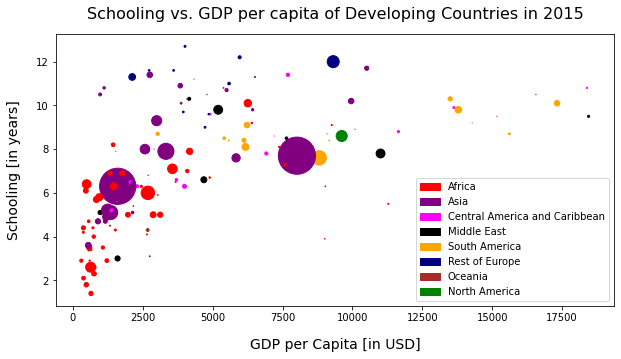

In [105]:
# read the csv file (data extraxted from https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated)
#world = pd.read_csv('data/world_development.csv', index_col=0)

# subset the rows where the economy status is developing and drop duplicate countries
developing_countries_2015_lowgdp = world[(world["Economy_status_Developing"] == 1) &
                                  (world["GDP_per_capita"] < 20000) &
                                  (world["Year"] == 2015)].drop_duplicates(subset="Country")

# scatter plot of Schooling vs. GDP per capita with population as size and region as color
#developing_countries_2015_lowgdp.plot(x="GDP_per_capita", y="Schooling", kind="scatter")
developing_countries_2015_lowgdp.plot.scatter(x="GDP_per_capita", y="Schooling", s="Population_mln", 
                                              c=developing_countries_2015_lowgdp["Region"].map(dict_col),
                                              figsize=(10, 5))

# customize plot labels (if size or padding is not necessary, it can be done with plot args above)
plt.title("Schooling vs. GDP per capita of Developing Countries in 2015", pad=15, fontsize=16)
plt.xlabel('GDP per Capita [in USD]', labelpad=15, fontsize=14)
plt.ylabel('Schooling [in years]', labelpad=15, fontsize=14)

# create legend handles, labels for each group and add legend to the plot
import matplotlib.patches as mpatches
legend_handles = [mpatches.Patch(color=dict_col[country], label=country) for country in regions_to_map.to_list()]

# create a legend to show the color mapping
plt.legend(handles=legend_handles, loc='best')

# show the plot
plt.show()

Another way of creating a scatter plot with matplotlib is to create a figure (the image container for the plot) and axe(s) (the plot to add the related data).

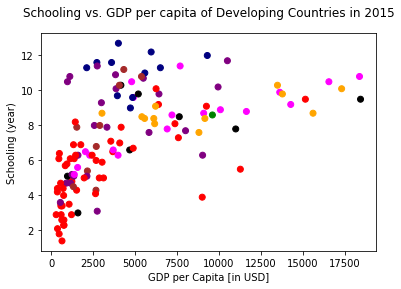

In [22]:
# read the csv file (data extraxted from https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated)
#world = pd.read_csv('data/world_development.csv', index_col=0)

# subset the rows within 2015 for developing countries
dev_2015 = world[(world["Year"] == 2015) & 
                 (world["GDP_per_capita"] < 20000) & 
                 (world["Economy_status_Developing"] == 1)].drop_duplicates(subset="Country")

# create a figure and an axes with plt.subplots
fig, ax = plt.subplots()

# plot a scatter plot of the schooling vs GDP for developing countries
ax.scatter(dev_2015["GDP_per_capita"], dev_2015["Schooling"], c=dev_2015["Region"].map(dict_col))

# set the customizations
ax.set_xlabel("GDP per Capita [in USD]")
ax.set_ylabel("Schooling (year)")
ax.set_title("Schooling vs. GDP per capita of Developing Countries in 2015", y=1.05)

# show the plot
plt.show()

#### 4) Histogram 
A histogram divides data into bins and counts the number of data points in each bin, where the height of each bar represents the count of data points within that bin. It is useful to explore the data and get an idea about the distribution. If not specified, by default Python sets the number of bins to 10. Too few bins will oversimplify, while too many bins will overcomplicate the reality.

- __Plot a List with a Histogram:__

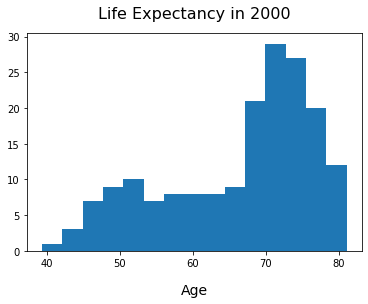

In [ ]:
# use the same life expectancy data and plot histogram with 15 bins
plt.hist(life_exp, 15)

# show plot
plt.title("Life Expectancy in 2000", pad=15, fontsize=16)
plt.xlabel('Age', labelpad=15, fontsize=14)
plt.show()

# to clear the plot if necessary
#plt.clf() 

- __Plot a DataFrame with a Histogram:__

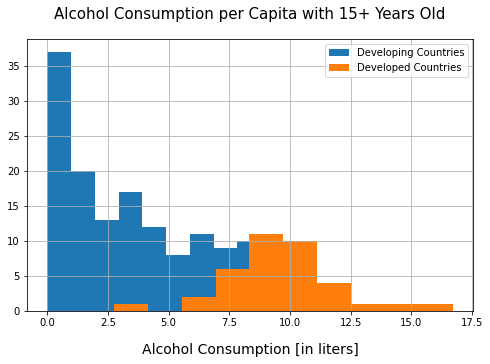

In [114]:
# read the csv file (data extraxted from https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated)
#world = pd.read_csv('data/world_development.csv', index_col=0)

# subset the rows of countries in 2015
world_2015 = world[world["Year"] == 2015]

# histogram of alcohol consumption (in liters of pure alcohol per capita with 15+ years old) in developing countries 
world_2015[world_2015["Economy_status_Developing"] == 1]["Alcohol_consumption"].hist(figsize=(8, 5))

# histogram of alcohol consumption (in liters of pure alcohol per capita with 15+ years old) in developed countries 
world_2015[world_2015["Economy_status_Developed"] == 1]["Alcohol_consumption"].hist(figsize=(8, 5))

# add a legend
plt.legend(["Developing Countries", "Developed Countries"])

# customize plot labels
plt.title("Alcohol Consumption per Capita with 15+ Years Old", pad=20, fontsize=15)
plt.xlabel("Alcohol Consumption [in liters]", labelpad=15, fontsize=14)

# show the plot
plt.show()

Another way of creating a histogram with matplotlib is to create a figure (the image container for the plot) and axe(s) (the plot to add the related data). To represent multiple histograms on the same figure, __histtype__ parameter is used to plot in lines rather than bars.

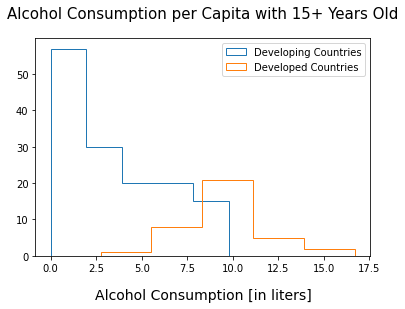

In [ ]:
# read the csv file (data extraxted from https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated)
#world = pd.read_csv('data/world_development.csv', index_col=0)

# subset the rows of countries in 2015
world_2015 = world[world["Year"] == 2015]

# create a figure and an axes with plt.subplots
fig, ax = plt.subplots()

# histogram of alcohol consumption (in liters of pure alcohol per capita with 15+ years old) in developing countries 
ax.hist(world_2015[world_2015["Economy_status_Developing"] == 1]["Alcohol_consumption"], label="Developing Countries", histtype='step', bins=5)

# histogram of alcohol consumption (in liters of pure alcohol per capita with 15+ years old) in developed countries 
ax.hist(world_2015[world_2015["Economy_status_Developed"] == 1]["Alcohol_consumption"], label="Developed Countries", histtype='step', bins=5)

# add a legend
plt.legend()

# customize plot labels
ax.set_title("Alcohol Consumption per Capita with 15+ Years Old", pad=20, fontsize=15)
ax.set_xlabel("Alcohol Consumption [in liters]", labelpad=15, fontsize=14)

# show the plot
plt.show()

#### 5) Boxplot 
A boxplot provides additionaol information about the distribution of the input data by providing the median, the inter-quartile range as well as the outliers.

- __Plot a List with a Boxplot:__

- __Plot a DataFrame with a Boxplot:__

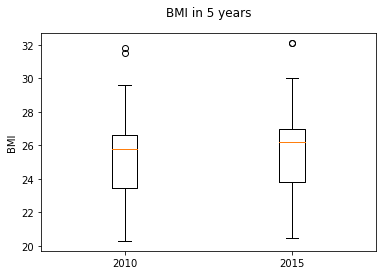

In [7]:
# read the csv file (data extraxted from https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated)
#world = pd.read_csv('data/world_development.csv', index_col=0)

# subset the rows within 2010
countries_2010 = world[world["Year"] == 2010].drop_duplicates(subset="Country")

# subset the rows within 2015
countries_2015 = world[world["Year"] == 2015].drop_duplicates(subset="Country")

# create a figure and an axes with plt.subplots
fig, ax = plt.subplots()

# plot a boxplot of BMI for 2010 and 2015
ax.boxplot([countries_2010["BMI"], countries_2015["BMI"]])

# set the customizations
ax.set_xticklabels(["2010", "2015"])
ax.set_ylabel("BMI")
ax.set_title("BMI in 5 years", y=1.05)

# show the plot
plt.show()

#### 6) Styling and Saving Plots
A plot can be further customized by defining it's visual appearence style. A list of available style sheets is provided by matplotlib library [here](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html).

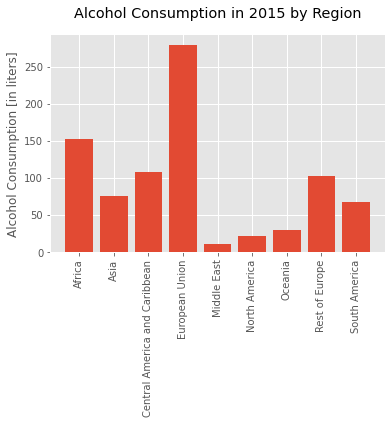

In [27]:
# read the csv file (data extraxted from https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated)
#world = pd.read_csv('data/world_development.csv', index_col=0)

# subset the rows within 2015
countries_2015 = world[world["Year"] == 2015].drop_duplicates(subset="Country")

# group by region and get the sum of the population
dev_by_region = countries_2015.groupby("Region").sum()

# use the "ggplot" style
plt.style.use('ggplot')

# create a figure and an axes with plt.subplots
fig, ax = plt.subplots()

# plot a bar plot of the developed countries by region
ax.bar(dev_by_region.index, dev_by_region["Alcohol_consumption"])

# set the customizations
ax.tick_params(axis='x', labelrotation = 90)
ax.set_ylabel("Alcohol Consumption [in liters]")
ax.set_title("Alcohol Consumption in 2015 by Region", y=1.05)

# show the plot
plt.show()

Matplotlib provides the ```.savefig()``` method of the Figure object to save a figure created while plotting. The __dpi__ parameter allows to specify the DPI (dots per inch), while ```.set_size_inches()``` method can be used to set the size of the figure before saving. By default, the file is saved to the working directory. To save in to a specific location, the path can be adapted accordingly.

In [29]:
# set figure dimensions
fig.set_size_inches([5, 3])

# save as a PNG file with 300 dpi
fig.savefig("image/figure_300dpi.png", dpi=300)

## Seaborn
[Seaborn](https://seaborn.pydata.org/) is a Python data visualization library, which is built on matplotlib. It provides a high-level interface to create most common types of plots easily, and works well with pandas. The official relase can be installed from [PyPI](https://pypi.org/project/seaborn/), while the library is also available as a part of the [Anaconda](https://repo.anaconda.com/) distribution.

In [ ]:
# install seaborn either with conda or with pip
# conda install seaborn -c conda-forge
%pip install seaborn

In [34]:
# import necessary libraries for plotting, pandas, and file reading
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv

#### 1) Count Plot

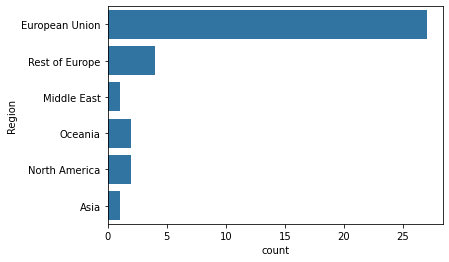

In [39]:
# read the csv file (data extraxted from https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated)
#world = pd.read_csv('data/world_development.csv', index_col=0)

# subset the developed countries in 2015
developed_2015 = world[(world["Year"] == 2015) & (world["Economy_status_Developed"] == 1)]

# create count plot with region on the y-axis
#sns.countplot(y=developed_2015["Region"])
sns.countplot(y="Region", data=developed_2015)

# show the plot
plt.show()

#### 2) Scatter Plot

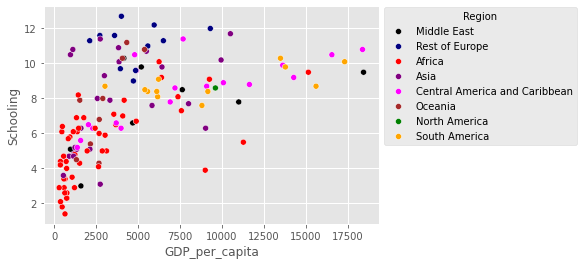

In [53]:
# read the csv file (data extraxted from https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated)
#world = pd.read_csv('data/world_development.csv', index_col=0)

# subset the rows within 2015 for developing countries
dev_2015 = world[(world["Year"] == 2015) & 
                 (world["GDP_per_capita"] < 20000) & 
                 (world["Economy_status_Developing"] == 1)].drop_duplicates(subset="Country")

# create a dictionary mapping subgroup values to colors
palette_colors = {"Africa": "red", "Asia": "purple", "Central America and Caribbean": "magenta", 
                  "Middle East": "black", "South America": "orange", "Rest of Europe": "navy", "Oceania": "brown", "North America": "green"}

# plot a scatter plot of the schooling vs GDP for developing countries
#sns.scatterplot(x=dev_2015["GDP_per_capita"], y=dev_2015["Schooling"])
ax = sns.scatterplot(x="GDP_per_capita", y="Schooling", data=dev_2015, hue="Region", palette=palette_colors)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.02))

# show plot
plt.show()

#### 3) Relational Plot
Relational plots are created with the ```.relplot()``` and are used to create scatter or line plots. The advantage of relational plots is the ability to create subplots in a single figure. Subplots are created depending on the __col__ and the __row__ parameters, where the values to differentiate the plots by rows and columns are specified. To change the order of subplots, __row_order__ and __col_order__ parameters are used.

- __Relational Line Plot:__ They are used to create line plots using the __kind__ parameter set to ```"line"```.

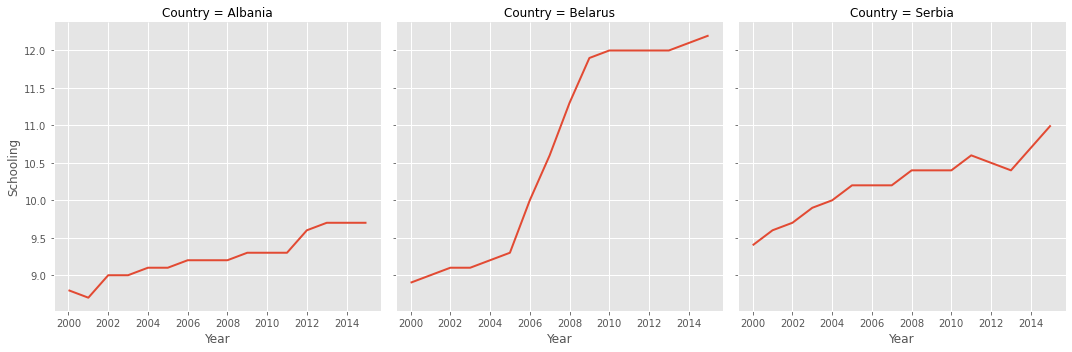

In [74]:
# read the csv file (data extraxted from https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated)
#world = pd.read_csv('data/world_development.csv', index_col=0)

# the list of countries to be plotted
countries = ["Serbia", "Albania", "Belarus"]

# subset the rows with selected countries
country_11_15 = world[world["Country"].isin(countries)]

# plot a line plot of the schooling for selected countries
sns.relplot(x="Year", y="Schooling", data=country_11_15, kind="line",
            col="Country", col_order=["Albania", "Belarus", "Serbia"])

# show plot
plt.show()

- __Relational Scatter Plot:__ They are used to create scatter plots using the __kind__ parameter set to ```"scatter"```.

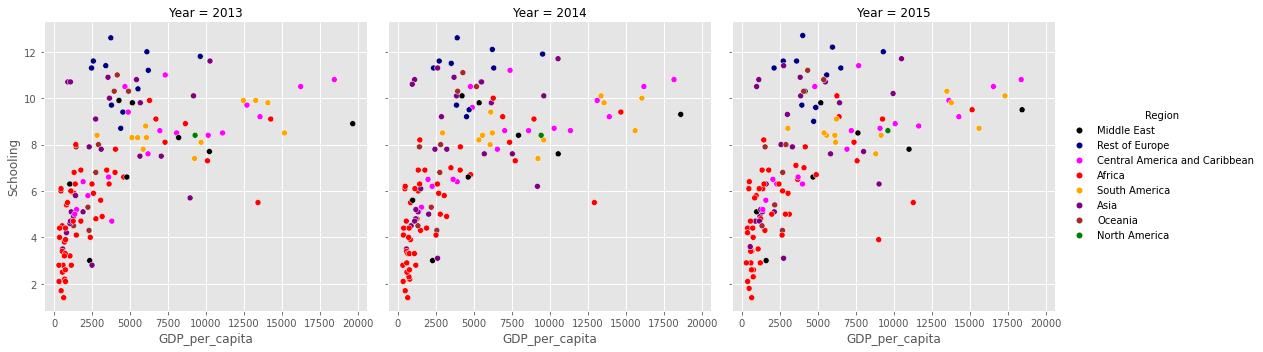

In [64]:
# read the csv file (data extraxted from https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated)
#world = pd.read_csv('data/world_development.csv', index_col=0)

# subset the rows within 2015 for developing countries
dev_11_15 = world[(world["Year"] <= 2015) & (world["Year"] > 2012) &
                 (world["GDP_per_capita"] < 20000) & 
                 (world["Economy_status_Developing"] == 1)]

# create a dictionary mapping subgroup values to colors
palette_colors = {"Africa": "red", "Asia": "purple", "Central America and Caribbean": "magenta", 
                  "Middle East": "black", "South America": "orange", "Rest of Europe": "navy", "Oceania": "brown", "North America": "green"}

# plot a scatter plot of the schooling vs GDP for developing countries separated by years in each row
sns.relplot(x="GDP_per_capita", y="Schooling", data=dev_11_15, kind="scatter",
            col="Year", col_order=[2013, 2014, 2015],
            hue="Region", palette=palette_colors)

# show plot
plt.show()

#### 4) Categorical Plot
Categorical plots are created with the ```.catplot()``` and are used to create ?? plots. The advantage of categorical plots is also the ability to create subplots in a single figure. Subplots are created depending on the __col__ and the __row__ parameters, where the values to differentiate the plots by rows and columns are specified. To change the order of subplots, __row_order__ and __col_order__ parameters are used.

- __Categorical Bar Plot:__ They are used to create bar plots using the __kind__ parameter set to ```"bar"```.

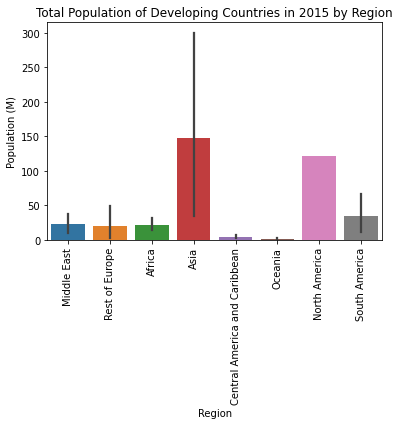

In [13]:
# read the csv file (data extraxted from https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated)
#world = pd.read_csv('data/world_development.csv', index_col=0)

# subset the rows where the economy status is developing and drop duplicate countries
developing_countries_2015 = world[(world["Economy_status_Developing"] == 1) &
                                  (world["Year"] == 2015)].drop_duplicates(subset="Country")

# create a bar plot of the total population of developing countries by region
ax = sns.barplot(data=developing_countries_2015, x='Region', y='Population_mln', hue='Region')

# rotate x axis labels for readability
ax.tick_params(axis='x', labelrotation=90)

# add additional plot features
ax.set_title("Total Population of Developing Countries in 2015 by Region")
ax.set_ylabel("Population (M)")

# show the plot
plt.show()